# QBITS – Angles, Probabilities, and the Qiskit Statevector

## Session 2_1 – From Angles to Probabilities
### UDL + 5E Model — Duration: 2 hours

---

## 1. Engage — Connect with Experience

> “When you tilt your compass needle, you can measure an *angle* with respect to the vertical.  
> But in the quantum world, this tilt doesn’t just indicate a direction — it encodes *probabilities*.  
> The further the qubit leans from the pole, the more ‘uncertain’ its orientation becomes.  
> Could an angle actually represent a probability?”

**Guiding Questions**
- How can an angle describe both *geometry* and *chance*?
- What happens when the needle is exactly halfway (45°)?  
- Can we express this balance numerically?

**Brief Activity**
- On paper, draw a semicircle with a vertical Z-axis.  
- Mark angles θ = 0°, 45°, 90°, and 180°.  
- Next to each angle, assign a “probability of being up” as you imagine it.  

> **Learning Objectives**
> - Connect geometric orientation (angle θ) with quantum probability.
> - Represent a qubit state as a mathematical combination of ∣0⟩ and ∣1⟩.
> - Visualize probabilities using Qiskit’s `Statevector`.

---

## 2. Explore — Paper Compass and Angle-to-Probability Mapping

**Materials**
- Paper strip (or pencil)
- Protractor or smartphone angle app
- Sheet of paper or whiteboard

**Procedure**
1. Place the strip vertically (θ = 0°). Label it **state ∣0⟩**.  
2. Rotate it halfway (θ = 90°). This should represent *equal probability*.  
3. Fully invert it (θ = 180°). Label it **state ∣1⟩**.  
4. Imagine that as you tilt, the *shadow on the Z-axis* gets shorter — representing a decrease in certainty.  

**Purpose**
- Build a visual analogy between *tilt* and *probability amplitude*.  
- Introduce the idea that the *length of projection* equals the *probability component* in quantum mechanics.

---

## 3. Explain — From Geometry to Probability (Expanded)

> The qubit’s orientation angle θ defines the *amplitude* of each base state (∣0⟩ and ∣1⟩), and from those amplitudes we can compute *probabilities* of measurement.

---

### 3.1 The Qubit Without Phase (φ = 0)

The simplest quantum state (without phase) is:

$$
∣ψ⟩ = \cos\left(\frac{θ}{2}\right)∣0⟩ + \sin\left(\frac{θ}{2}\right)∣1⟩
$$

Here,  
- the **amplitudes** are $\alpha = \cos(\frac{θ}{2})$ and $\beta = \sin(\frac{θ}{2})$,  
- the **probabilities** are the squares of those amplitudes.

$$
P(0) = |α|^2 = \cos^2\left(\frac{θ}{2}\right), \qquad
P(1) = |β|^2 = \sin^2\left(\frac{θ}{2}\right)
$$

---

### 3.2 Numerical Example (φ = 0)

Let’s pick an example angle:  
$\displaystyle θ = 60° = \frac{π}{3}$

Then:

$$
α = \cos(30°) = 0.866, \quad β = \sin(30°) = 0.5
$$

Now the probabilities:

$$
P(0) = (0.866)^2 = 0.75, \qquad P(1) = (0.5)^2 = 0.25
$$

So,  
- There’s a **75% chance** of measuring ∣0⟩  
- and **25% chance** of measuring ∣1⟩.  
These always sum to **1** (100%) → this is **normalization**.

$$
P(0) + P(1) = 0.75 + 0.25 = 1
$$

> **Interpretation:**  
> The qubit is “leaning” closer to ∣0⟩ than ∣1⟩ — a partially inclined compass needle.

---

### 3.3 Including Phase (φ ≠ 0)

Now we include a **phase angle φ**, which modifies the complex part of β:

$$
∣ψ⟩ = \cos\left(\frac{θ}{2}\right)∣0⟩ + e^{iφ}\sin\left(\frac{θ}{2}\right)∣1⟩
$$

Here $e^{iφ}$ adds a rotation in the complex plane but does **not** affect probabilities.

#### Example:
Let’s use the same θ = π/3 and add φ = π/2 (90° phase):

$$
α = \cos(30°) = 0.866, \quad β = e^{i\frac{π}{2}}\sin(30°) = i(0.5)
$$

Now the probabilities:

$$
P(0) = |0.866|^2 = 0.75, \qquad P(1) = |i(0.5)|^2 = 0.25
$$

Even though β now includes an *imaginary unit i*, its magnitude squared remains **the same**.

> **Key Idea:**  
> - Phase changes the *orientation* of the vector in the complex plane, not its *length*.  
> - Therefore, **measurement probabilities remain unchanged**.

---

### 3.4 Summary Table

| Parameter | Meaning | Mathematical Form | Example (θ=π/3, φ=π/2) | Probability |
|------------|----------|------------------|--------------------------|-------------|
| α | Amplitude for ∣0⟩ | $\cos(\frac{θ}{2})$ | 0.866 | 0.75 |
| β | Amplitude for ∣1⟩ | $e^{iφ}\sin(\frac{θ}{2})$ | i·0.5 | 0.25 |
| $P(0)$ | Prob. of ∣0⟩ | abs(α)^2 | — | 0.75 |
| $P(1)$ | Prob. of ∣1⟩ | abs(β)^2 | — | 0.25 |
| Total | Normalization | $P(0)+P(1)=1$ | — | :D |

---
This transition from geometry to probability is the **core of quantum representation**.

---

## 4. Elaborate — Computational Exploration (Qiskit SDK)

> Now we’ll use Qiskit to calculate and visualize the state probabilities directly from θ.

```python
# Qiskit Exploration: Angles and Probabilities
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Choose an angle θ (in radians)
theta = np.pi / 3   # 60 degrees

# Build the circuit
qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.draw('mpl')

### Step 1 – Visualize the Statevector

```python
# Get the statevector and display it
state = Statevector.from_instruction(qc)
print("Statevector:", state.data)

### Step 2 – Compute Probabilities

```python
# Display probabilities
probs = state.probabilities_dict()
print("Measurement Probabilities:")
print(probs)

### Step 3 – Visualize Orientation
```python
plot_bloch_multivector(state)

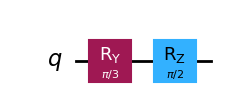

In [23]:
# Now let’s verify everything with Qiskit numerically: amplitudes, probabilities, and normalization.

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Example parameters
theta = np.pi / 3  # 60 degrees
phi = np.pi / 2     # 90 degrees phase

qc = QuantumCircuit(1)
qc.ry(theta, 0)   # Inclination (θ)
qc.rz(phi, 0)     # Phase rotation (φ)
qc.draw('mpl')



In [24]:
# Step 1 – Statevector amplitudes
state = Statevector.from_instruction(qc)
alpha, beta = state.data
print(f"α (amplitude for |0>): {alpha}")
print(f"β (amplitude for |1>): {beta}")

α (amplitude for |0>): (0.6123724356957946-0.6123724356957946j)
β (amplitude for |1>): (0.35355339059327373+0.35355339059327373j)


In [25]:
# Step 2 – Probabilities and normalization

probs = state.probabilities_dict()
print("\nProbabilities of measurement:")
for k,v in probs.items():
    print(f"P({k}) = {v:.3f}")

# Check normalization
print("\nNormalization check:", sum(probs.values()))


Probabilities of measurement:
P(0) = 0.750
P(1) = 0.250

Normalization check: 1.0000000000000004


In [27]:
# Expected Output for 45 and 45 (approx.):
#α = 0.60 -0.60j
#β = 0.35 + 0.35j
#P(0) = 0.75
#P(1) = 0.25
#Normalization check: 1.0

### Experiment Observation:

The imaginary component in β does not change $|β|^2$.
The probabilities remain 0.75 and 0.25 — identical to the no-phase case.

### Guided Exploration

- Change θ to 0, π/2, π, π/3, π/4.
- Observe how probabilities vary.
>Verify numerically that P(0) + P(1) = 1 in all cases.

### Discussion queries

- Which θ gives equal probabilities?
- Why do small angles favor ∣0⟩?
- How does this experiment confirm the geometric meaning of θ?

## 5.Evaluate — Reflection and Formative Assessment

### Activity: "Describe Your Qubit"

Each participant selects one angle θ and runs the circuit.
Then they describe the resulting state in three ways:

>Physical: direction of tilt.

>Mathematical: expression of ∣ψ⟩.

>Probabilistic: values of P(0) and P(1).

### Guided Reflection

>What does θ represent physically and numerically?

>How does the Qiskit output confirm the mathematical prediction?

>Why are ∣0⟩ and ∣1⟩ considered limit states?

### Instructor Suggestion

Ask students to annotate a Bloch circle showing their chosen θ and corresponding probabilities.
Encourage sharing of screenshots or hand-drawn visuals to reinforce spatial understanding.